<a href="https://colab.research.google.com/github/ankitdv98/Flight-Fare-Prediction/blob/main/Flight_Fares_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data= pd.read_excel(r'Data_Train.xlsx') #Display all the columns in the dataset

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9,5


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
47h          1
4h 10m       1
5m           1
31h 50m      1
41h 20m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)  #very small can be dropped

In [ ]:
train_data.shape

(10682, 11)

#EDA

In [ ]:
#Get data and month of Journey
train_data['journey_day']= pd.to_datetime(train_data['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [ ]:
train_data['journey_month']= pd.to_datetime(train_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
train_data.drop(columns= 'Date_of_Journey', axis= 1, inplace= True)

In [ ]:
#converting departure time to hour and minute
train_data['dep_hour']= pd.to_datetime(train_data['Dep_Time']).dt.hour

train_data['dep_minute']= pd.to_datetime(train_data['Dep_Time']).dt.minute

#dropping Date_Time columns
train_data.drop(['Dep_Time'], axis= 1, inplace= True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
#Extracting hour and minute from the arrival time column
train_data['arrival_hour']= pd.to_datetime(train_data['Arrival_Time']).dt.hour

train_data['arrival_minute']= pd.to_datetime(train_data['Arrival_Time']).dt.minute
#dropping the arrival time column
train_data.drop(['Arrival_Time'], axis= 1, inplace= True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
'2h 50m'.split()

['2h', '50m']

In [ ]:
'2h 50m'.split(sep= 'h')[0]

'2'

In [ ]:
int('2h 50m'.split(sep= 'm')[0].split()[-1])

50

In [ ]:
# Duration: difference between depature time and arrival time
# object/string type not in date time format
duration= list(train_data['Duration'])
for i in range(len(duration)):
  if duration[i].split() != 2:
    if 'h' in duration[i]:
      duration[i]= duration[i].strip() + " 0m"  #some hour + 0m
    else:
      duration[i]= "0h " + duration[i]

duration_hours= []
duration_mins= []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep= 'h')[0]))  #get only int hour
  duration_mins.append(int(duration[i].split(sep= 'm')[0].split()[-1]))  #get onlt min

In [ ]:
train_data['duration_hours']= duration_hours
train_data['duration_mins']= duration_mins

In [ ]:
train_data.drop(['Duration'], axis= 1, inplace= True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#Handling Categorical Data

In [ ]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

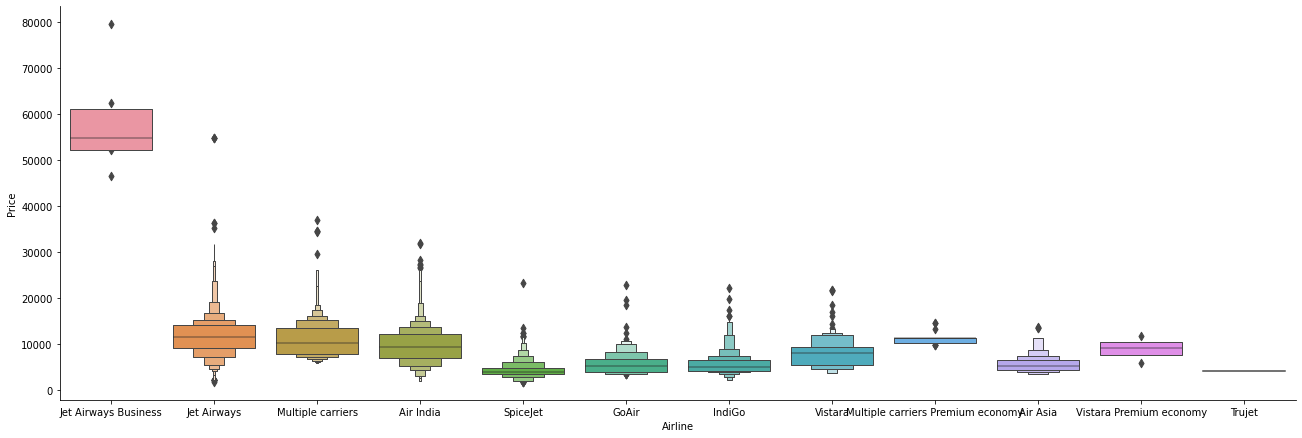

In [74]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6 , aspect = 3)
plt.show()

#Jet Airways Buisness have the heighest price rest are almost in similar range

In [85]:
#Airlines is Nominal Categorical data so apply One Hot Encoding
Airline= train_data[['Airline']]
Airline= pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [80]:
#looking at Source Column
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

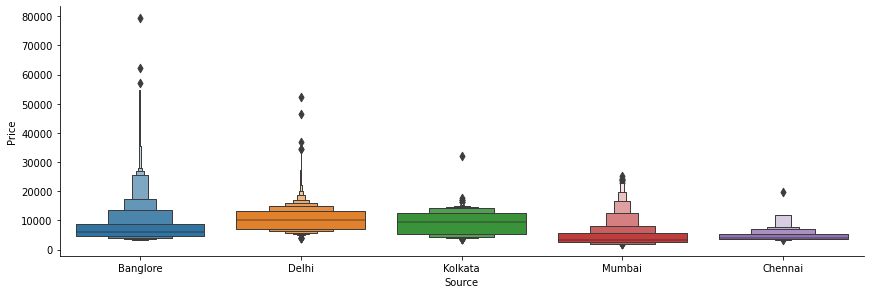

In [82]:
#plotting Source data
sns.catplot(y= 'Price', x= 'Source', data= train_data.sort_values("Price", ascending = False), kind= 'boxen', height= 4, aspect= 3)
plt.show()

In [84]:
# Source is Nominal Categorical: Apply one hot encoding
Source= train_data[['Source']]
Source= pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [86]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

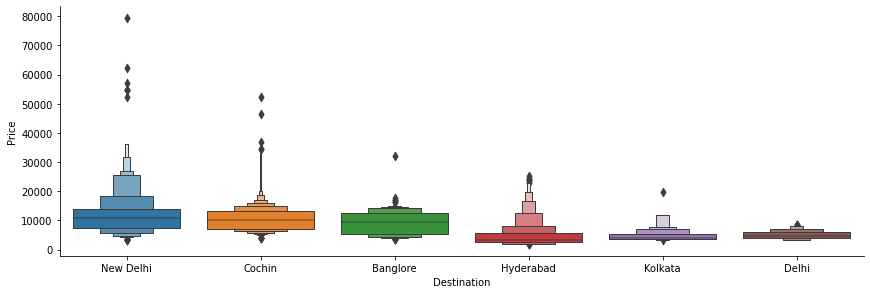

In [87]:
#visualising Destination
sns.catplot(y= 'Price', x= 'Destination', data= train_data.sort_values('Price', ascending= False), kind= 'boxen', height= 4, aspect= 3)
plt.show()

In [88]:
Destination= train_data[['Destination']]
Destination= pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [92]:
train_data['Additional_Info'].value_counts(normalize= True)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
Red-eye flight                  0.000094
2 Long layover                  0.000094
1 Short layover                 0.000094
Name: Additional_Info, dtype: float64

In [89]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [90]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [94]:
# Additional info have No Info 80% of time
# Total_Stops and Route giving the same info
# So Additional info and Route Both can be dropped
train_data.drop(['Route', 'Additional_Info'], axis= 1, inplace= True)

In [95]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [98]:
# looking at Total Stops---> Since more the stops more the price so 
# Ordinal  Categorical Feature
# Applying Label Encoding accordingly
train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace= True)

In [99]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [101]:
data_train= pd.concat([train_data, Airline, Source, Destination], axis= 1)

In [102]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [104]:
data_train.drop(['Airline', 'Source', 'Destination'], axis= 1, inplace= True)

In [105]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [106]:
data_train.shape

(10682, 30)

#Test Data

In [125]:
test_data= pd.read_excel(r'Test_set.xlsx')

In [126]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [127]:
#Preparing test data
#Preprocessing
test_data.dropna(inplace=True)  #very small can be dropped
test_data.isnull().sum()

#EDA
#Date of Journey
test_data['journey_day']= pd.to_datetime(test_data['Date_of_Journey'], format= "%d/%m/%Y").dt.day
test_data['journey_month']= pd.to_datetime(test_data['Date_of_Journey'], format= "%d/%m/%Y").dt.month
test_data.drop(columns= 'Date_of_Journey', axis= 1, inplace= True)

#Departure time to hour and minute
test_data['dep_hour']= pd.to_datetime(test_data['Dep_Time']).dt.hour

test_data['dep_minute']= pd.to_datetime(test_data['Dep_Time']).dt.month

#dropping Date_Time columns
test_data.drop(['Dep_Time'], axis= 1, inplace= True)

#Extracting hour and minute from the arrival time column
test_data['arrival_hour']= pd.to_datetime(test_data['Arrival_Time']).dt.hour

test_data['arrival_minute']= pd.to_datetime(test_data['Arrival_Time']).dt.minute
#dropping the arrival time column
test_data.drop(['Arrival_Time'], axis= 1, inplace= True)

# Duration: difference between depature time and arrival time
# object/string type not in date time format
duration= list(test_data['Duration'])
for i in range(len(duration)):
  if duration[i].split() != 2:
    if 'h' in duration[i]:
      duration[i]= duration[i].strip() + " 0m"  #some hour + 0m
    else:
      duration[i]= "0h " + duration[i]

duration_hours= []
duration_mins= []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep= 'h')[0]))  #get only int hour
  duration_mins.append(int(duration[i].split(sep= 'm')[0].split()[-1]))  #get onlt min

test_data['duration_hours']= duration_hours
test_data['duration_mins']= duration_mins
test_data.drop(['Duration'], axis= 1, inplace= True)

#Airlines is Nominal Categorical data so apply One Hot Encoding
Airline= test_data[['Airline']]
Airline= pd.get_dummies(Airline, drop_first= True)

# Source is Nominal Categorical: Apply one hot encoding
Source= test_data[['Source']]
Source= pd.get_dummies(Source, drop_first= True)

# Destination: Nominal: Apply one hot encoding
Destination= test_data[['Destination']]
Destination= pd.get_dummies(Destination, drop_first= True)

test_data.drop(['Route', 'Additional_Info'], axis= 1, inplace= True)

test_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace= True)

In [128]:
data_test= pd.concat([test_data, Airline, Source, Destination], axis= 1)

In [129]:
data_test.drop(['Airline', 'Source', 'Destination'], axis= 1, inplace= True)

In [130]:
data_test.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,12,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,12,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,12,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,12,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,12,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [131]:
data_test.shape

(2671, 28)

#Feature Selection

In [134]:
X= data_train.drop('Price', axis= 1).copy()
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
y= data_train['Price'].copy()
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

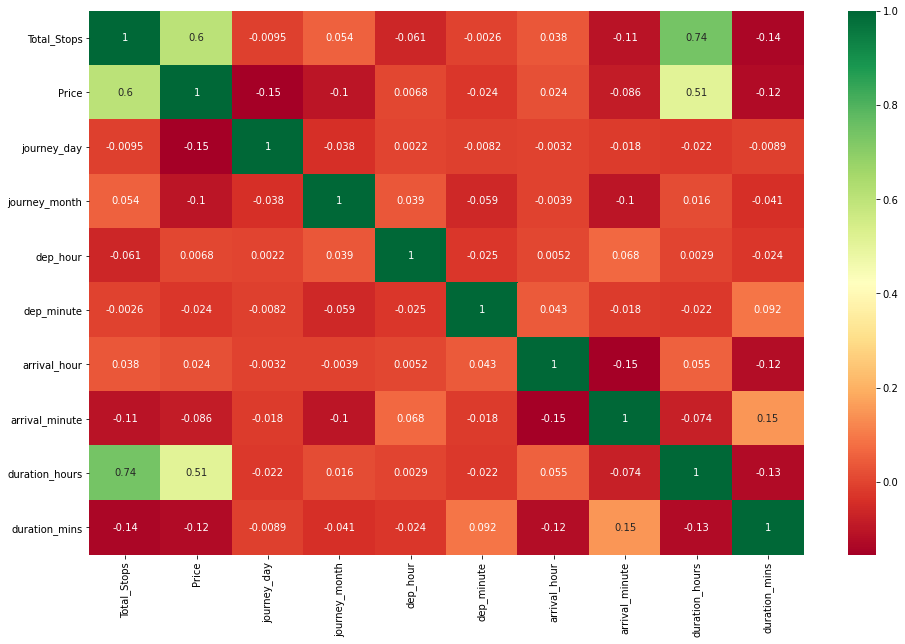

In [142]:
#using heatmap to correlations between features
plt.figure(figsize= (14,10))
sns.heatmap(train_data.corr(), annot= True, cmap= 'RdYlGn')
plt.show()

In [148]:
#Important fetures using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [149]:
print(selection.feature_importances_)

[2.35444952e-01 1.43575253e-01 5.38834232e-02 2.34944413e-02
 2.08712186e-02 2.83939673e-02 1.92926148e-02 1.16520414e-01
 1.79723047e-02 8.86309064e-03 1.61232015e-03 1.76485586e-02
 1.37743520e-01 6.75550536e-02 1.97012107e-02 8.61214692e-04
 2.77877513e-03 7.63004708e-05 5.00326845e-03 8.39371322e-05
 4.74701015e-04 1.27868532e-02 3.23881091e-03 5.99793850e-03
 8.88359111e-03 1.48901286e-02 7.02186202e-03 4.93234449e-04
 2.48370422e-02]


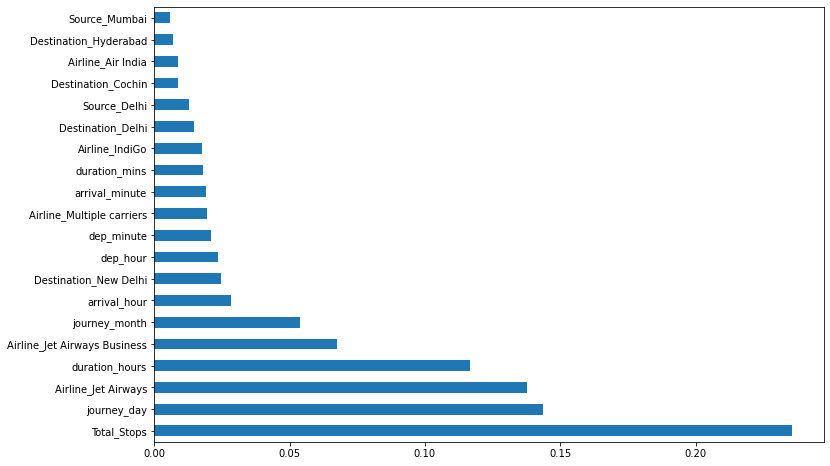

In [150]:
# plotting the feature imortances
plt.figure(figsize= (12,8))
feat_importance= pd.Series(selection.feature_importances_, index= X.columns)
feat_importance.nlargest(20).plot(kind= 'barh')
plt.show()

In [151]:
#Fitting model using Raandom Forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state = 42)

In [152]:
from sklearn.ensemble import RandomForestRegressor
reg_rf= RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [153]:
y_pred= reg_rf.predict(X_test)

In [154]:
reg_rf.score(X_train, y_train)

0.9539086841352891

In [155]:
reg_rf.score(X_test, y_test)

0.7964188511779853

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


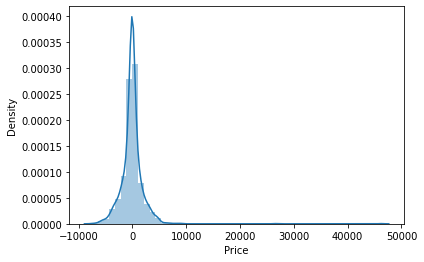

In [156]:
sns.distplot(y_test-y_pred)
plt.show()

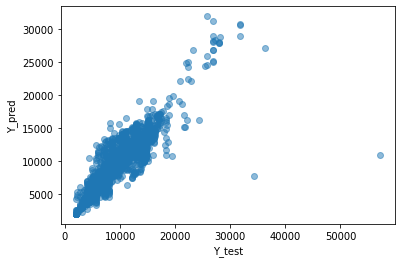

In [167]:
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
print("mean_squared_error: ", mean_squared_error(y_test, y_pred))
print("Root_mean_squared_error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

mean_absolute_error:  1178.2056294008335
mean_squared_error:  4389628.197437846
Root_mean_squared_error:  2095.14395625643


In [169]:
from sklearn.metrics import r2_score

In [170]:
r2_score(y_test, y_pred)

0.7964188511779852

#Hyperparameter Tuning

In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [172]:
#No of Trees in random forest
n_estimators= [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]
#No f features to consider at every split
max_features= ['auto', 'sqrt']
#Max no of level in trees
max_depth= [int(x) for x in np.linspace(5, 30, num= 6)]
#Min sample split
min_samples_split= [2,5,10,15,100]
#Min samples at each leaf node
min_samples_leaf= [1,2,5,10]

In [175]:
random_grid= {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

In [178]:
#Random search for parameters
rf_random= RandomizedSearchCV(estimator= reg_rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', 
                              n_iter= 10, cv= 5, verbose= 2, random_state= 42, n_jobs= 1)

In [179]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [182]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [183]:
prediction= rf_random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


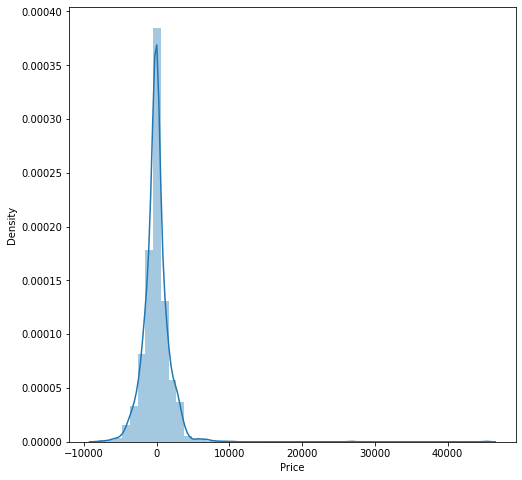

In [185]:
plt.figure(figsize= (8,8))
sns.distplot(y_test-prediction)
plt.show()

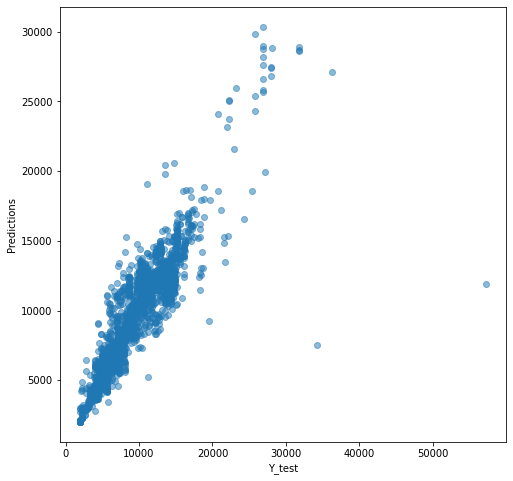

In [187]:
plt.figure(figsize= (8,8))
plt.scatter(y_test, prediction, alpha= 0.5)
plt.xlabel("Y_test")
plt.ylabel("Predictions")
plt.show()

In [189]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.9958496473348
MSE: 4047991.681728745
RMSE: 2011.9621471908324


#Save the model to reuse

In [205]:
import pickle
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [206]:
model= open('flight_rf.pkl', 'rb')
forest= pickle.load(model)

In [207]:
y_pred= forest.predict(X_test)

In [208]:
metrics.r2_score(y_test, y_pred)

0.8122631895181218

In [209]:
pwd

'/content/drive/My Drive/Kaggle'

In [203]:
%cd drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


In [204]:
pwd

'/content/drive/MyDrive/Kaggle'